In [1]:
#Importing the librearies:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Loading the data from the specified route:

data = pd.read_csv("T1.csv")


In [3]:
#Exploring the data:

print(data.head())
print(data.describe())
print(data.info())


          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  
       LV ActivePower (kW)  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
count         50530.000000      50530.000000                   50530.000000   
mean           1307.684332          7.557952                    1492.175463   
std            1312.459242          4.227166                

In [4]:
# Filtering out rows with negative or zero LV ActivePower values:

data = data[data['LV ActivePower (kW)'] > 0]

# Removing missing values:

data = data.dropna()

# Printing the first 5 rows of the cleaned dataset:

print(data.head())

# Printing the data description:

print(data.describe())

          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  
       LV ActivePower (kW)  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
count         39692.000000      39692.000000                   39692.000000   
mean           1664.751281          8.769781                    1829.739672   
std            1264.303861          3.773594                

/Users/arnav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/arnav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/arnav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/arnav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

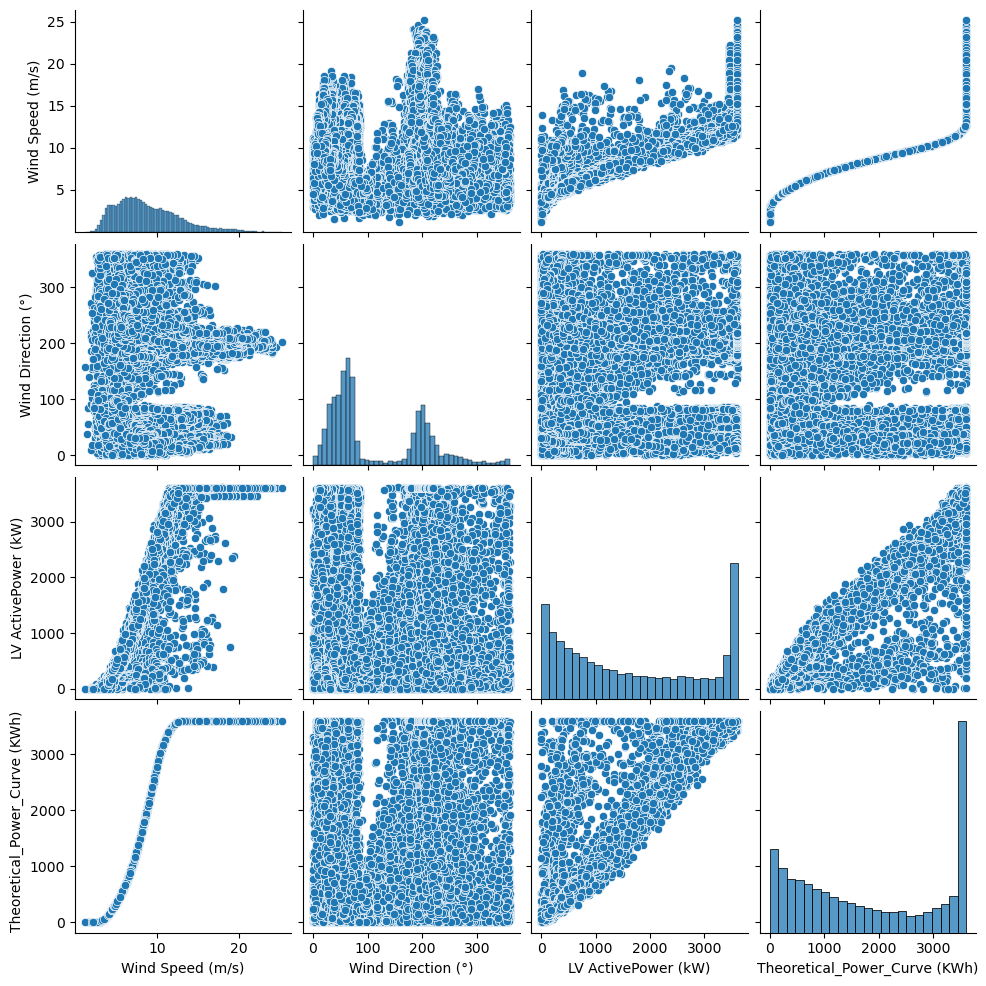

In [5]:
# Creating Pair plot of Wind Speed, Wind Direction, LV ActivePower, and Theoretical_Power_Curve

sns.pairplot(data=data, vars=["Wind Speed (m/s)", "Wind Direction (°)", "LV ActivePower (kW)", "Theoretical_Power_Curve (KWh)"])
plt.show()

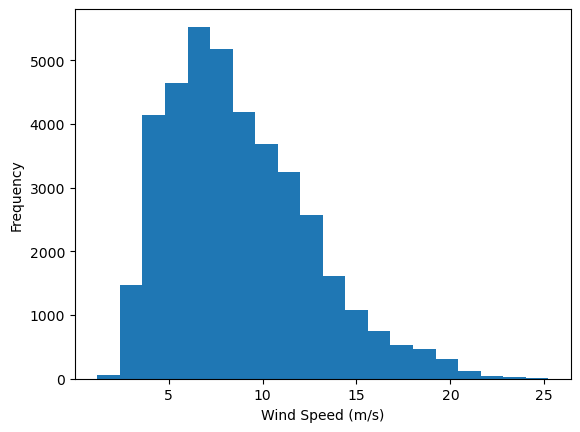

In [6]:
plt.hist(data["Wind Speed (m/s)"], bins=20)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

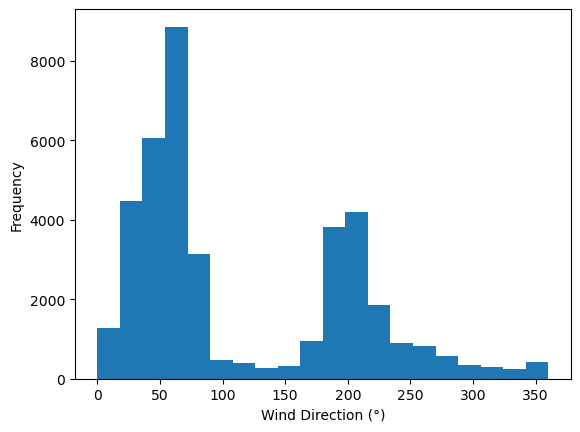

In [7]:
plt.hist(data["Wind Direction (°)"], bins=20)
plt.xlabel("Wind Direction (°)")
plt.ylabel("Frequency")
plt.show()

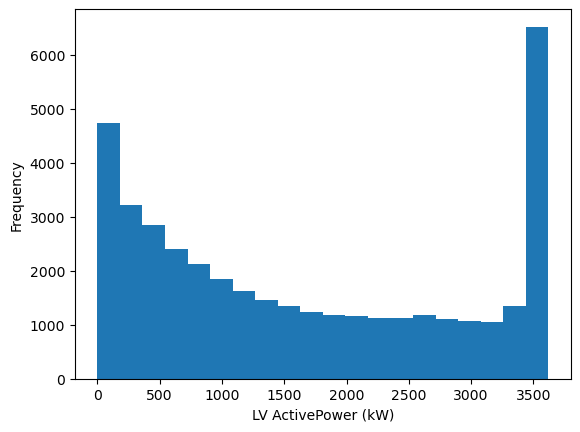

In [8]:
plt.hist(data["LV ActivePower (kW)"], bins=20)
plt.xlabel("LV ActivePower (kW)")
plt.ylabel("Frequency")
plt.show()

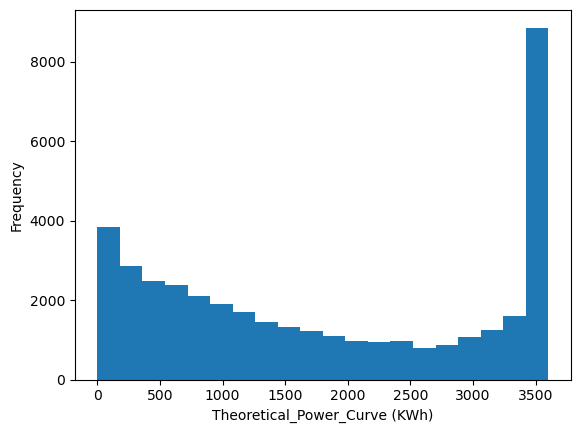

In [9]:
plt.hist(data["Theoretical_Power_Curve (KWh)"], bins=20)
plt.xlabel("Theoretical_Power_Curve (KWh)")
plt.ylabel("Frequency")
plt.show()

In [10]:
# Box plot of LV ActivePower by month
data["Month"] = pd.to_datetime(data["Date/Time"]).dt.month
sns.boxplot(x="Month", y="LV ActivePower (kW)", data=data)
plt.xlabel("Month")
plt.ylabel("LV ActivePower (kW)")
plt.show()

ValueError: time data "13 01 2018 00:00" doesn't match format "%m %d %Y %H:%M", at position 1258. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [11]:
# Importing the necessary libraries:

from sklearn.model_selection import train_test_split

# Preparing the data:

X = data[['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)']]
y = data['LV ActivePower (kW)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [12]:
# Importing the necessary libraries:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preparing the data:

X = data[['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)']]
y = data['LV ActivePower (kW)']

# Splitting the data:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building the model:

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model, calculating metrics:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the coefficients and intercept:

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Coefficients: [50.847803    0.30246839  0.80591175]
Intercept: -291.0672298196007
Mean Squared Error: 72844.55159195741
Mean Absolute Error: 137.72002673118868
R-squared: 0.9547508782620041


In [13]:
pickle.dump(model, open('model2.pkl','wb'))